In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hasasia.sensitivity as hsen
import hasasia.sim as hsim

In [14]:
phi = np.random.uniform(0, 2*np.pi,size=34)
cos_theta = np.random.uniform(-1,1,size=34)
#This ensures a uniform distribution across the sky.
theta = np.arccos(cos_theta)


In [15]:
timespan=[11.4 for ii in range(10)]
timespan.extend([3.0 for ii in range(24)])

In [16]:
psrs = hsim.sim_pta(timespan=timespan, cad=23, sigma=1e-7,
                    phi=phi,theta=theta)

In [17]:
freqs = np.logspace(np.log10(5e-10),np.log10(5e-7),500)


In [18]:
psrs2 = hsim.sim_pta(timespan=timespan,cad=23,sigma=1e-7,
                     phi=phi,theta=theta,
                     A_rn=6e-16,alpha=-2/3.,freqs=freqs)

In [19]:
spectra = []
for p in psrs:
    sp = hsen.Spectrum(p, freqs=freqs)
    sp.NcalInv
    spectra.append(sp)

In [20]:
spectra2 = []
for p in psrs2:
    sp = hsen.Spectrum(p, freqs=freqs)
    sp.NcalInv
    spectra2.append(sp)


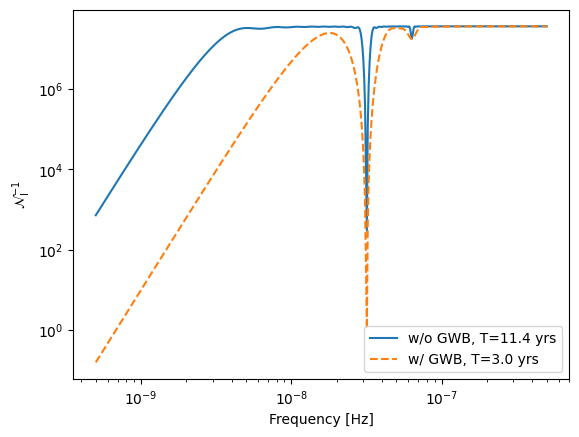

In [21]:
plt.loglog(spectra[0].freqs,spectra[0].NcalInv,
           label='w/o GWB, T={0} yrs'.format(timespan[0]))
plt.loglog(spectra2[20].freqs,spectra2[20].NcalInv,'--',
           label='w/ GWB, T={0} yrs'.format(timespan[20]))
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\mathcal{N}^{-1}_{\rm I}$')
plt.legend()
plt.show()

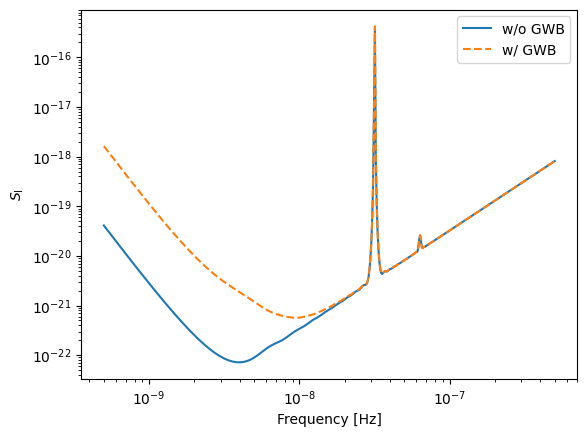

In [22]:
plt.loglog(spectra[0].freqs,spectra[0].S_I,label='w/o GWB')
plt.loglog(spectra2[0].freqs,spectra2[0].S_I,'--',label='w/ GWB')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_{\rm I}$')
plt.legend()
plt.show()

# Sensitivity Curves

In [23]:
sc1a = hsen.GWBSensitivityCurve(spectra)
sc1b = hsen.DeterSensitivityCurve(spectra)
sc2a = hsen.GWBSensitivityCurve(spectra2)
sc2b = hsen.DeterSensitivityCurve(spectra2)

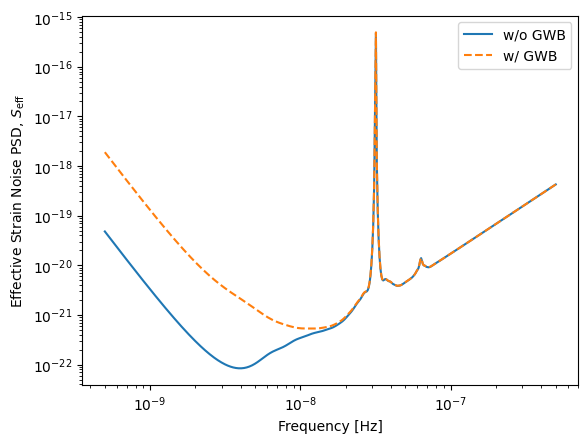

In [24]:
plt.loglog(sc1a.freqs,sc1a.S_eff,label='w/o GWB')
plt.loglog(sc2a.freqs,sc2a.S_eff,'--',label='w/ GWB')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Effective Strain Noise PSD, $S_{\rm eff}$')
plt.legend()
plt.show()